In [47]:
import pandas as pd

In [48]:
df = pd.read_excel("C:\\Users\\Shraddha\\Downloads\\Titanic.xlsx")

In [49]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [50]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin'],inplace = True,axis = 1)

In [51]:
df.head()

,Pclass,Sex,Age,Embarked,Survived
0,3,male,22.0,S,0
1,1,female,38.0,C,1
2,3,female,26.0,S,1
3,1,female,35.0,S,1
4,3,male,35.0,S,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Embarked  889 non-null    object 
 4   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [53]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Embarked      2
Survived      0
dtype: int64

In [54]:
df.dropna(subset=['Embarked'],inplace=True)

In [55]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Embarked      0
Survived      0
dtype: int64

In [56]:
x=df['Age'].mean()
round(x)

30

In [57]:
df['Age'] = df['Age'].fillna(round(x))
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [58]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
Survived    0
dtype: int64

In [59]:
df.head(2)

,Pclass,Sex,Age,Embarked,Survived
0,3,male,22.0,S,0
1,1,female,38.0,C,1


In [60]:
final = pd.get_dummies(data=df,columns=['Sex','Embarked'],drop_first=True)

In [61]:
final[: 5]

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,0,1,0,1
1,1,38.0,1,0,0,0
2,3,26.0,1,0,0,1
3,1,35.0,1,0,0,1
4,3,35.0,0,1,0,1


In [69]:
final.shape

(889, 6)

In [81]:
X=final.drop(['Survived'],axis=1)

In [82]:
y=final['Survived']

In [83]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [91]:
X_train.shape

(595, 5)

In [92]:
X_test.shape

(294, 5)

In [93]:
from sklearn.naive_bayes import BernoulliNB

In [94]:
model=BernoulliNB()

In [95]:
model.fit(X_train,y_train)

BernoulliNB()

In [97]:
model.score(X_test,y_test)

0.7959183673469388

In [98]:
X_test[:5]

,Pclass,Age,Sex_male,Embarked_Q,Embarked_S
281,3,28.0,1,0,1
435,1,14.0,0,0,1
39,3,14.0,0,0,0
418,2,30.0,1,0,1
585,1,18.0,0,0,1


In [99]:
y_test[:5]

281    0
435    1
39     1
418    0
585    1
Name: Survived, dtype: int64

In [100]:
model.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [103]:
from sklearn.naive_bayes import GaussianNB

In [105]:
np=GaussianNB()
np.fit(X_train,y_train)
np.score(X_test,y_test)

0.7789115646258503

In [106]:
from sklearn.naive_bayes import MultinomialNB

In [110]:
mb=MultinomialNB()
mb.fit(X_train,y_train)
mb.score(X_test,y_test)

0.6938775510204082

In [111]:
predicted =model.predict(X_test)

In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
cm=confusion_matrix(y_test,predicted)

In [114]:
import seaborn as sns

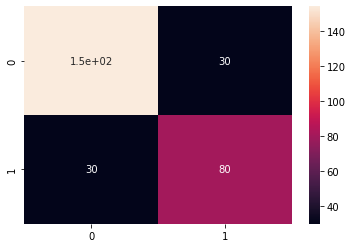

In [115]:
# plot heatmap
sns.heatmap(cm,annot=True)
plt.show()